# 线性基算法
参考[线性基算法概述](https://www.ruanx.net/linear-basis/)

线性基指的是在线性空间中，动态维护一组基，实现“快速判断一个给定向量能否被这组基线性表示”等任务的高效算法。

需要解决的问题：n维欧几里得空间中，判断一个给定向量能否被一组基线性表示

+ 高斯消元解线性方程组？$O(n^3)$的时间复杂度
+ 先构造k个交基，再组合基向量，$O(n \cdot k)$的时间复杂度

### Gram－Schmidt正交化
能够通过这一子空间上的一个基得出子空间的一个正交基，并可进一步求出对应的标准正交基
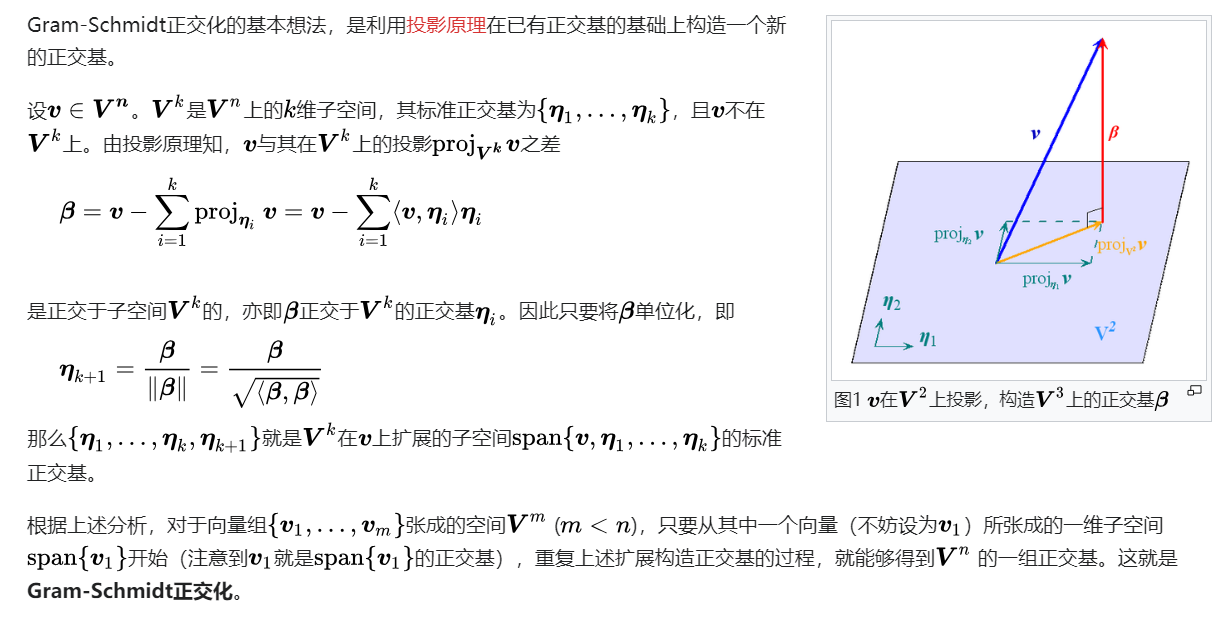


OI中指的是一个数能否通过集合中的若干个数的异或和表示，例如

In [4]:
import numpy as np
import random
ys =[633, 211, 169, 841, 1008]   # 一些数


def itoline(n):
    res = []
    for x in range(64):
        res.append((n>>x) & 1)
    return np.array(res[::-1])

def xorLine(a, b):
    c = np.zeros(64, dtype=int)
    for x in range(64):
        c[x] = a[x] ^ b[x]

    return c

def norm(lis):
    s = set(lis)
    res = []

    for x in s:
        if lis.count(x) % 2 == 1:
            res.append(x)
    
    return res

def getXor(lis):
    res = 0

    for x in lis:
        res ^= ys[x]

    return res

class Basis():
    
    def __init__(self):
        self.m = np.zeros([64, 64], dtype=int)
        self.ori = [list() for x in range(64)]

    def debug(self):
        print(self.m)
    
    def add(self, n, nid):
        v = itoline(n)
        p = [nid]

        for i in range(64):
            if v[i] == 1:
                if self.m[i, i] == 1:
                    v = xorLine(v, self.m[i, :])
                    
                    for x in self.ori[i]:
                        p.append(x)
                else:
                    p = norm(p)

                    self.m[i] = v
                    self.ori[i] = p

                    print(p)

                    return

    def has(self, n):
        v = itoline(n)
        p = []

        for i in range(64):
            if v[i] == 1:
                if self.m[i, i] == 1:
                    v = xorLine(v, self.m[i, :])
                    for x in self.ori[i]:
                        p.append(x)
                else:
                    return False
        p = norm(p)
        print(f'The basis has {n}')
        print(p)
        print(getXor(p))
        return True
    
    def rank(self):
        res = 0

        for i in range(64):
            if self.m[i, i] != 0:
                res += 1
        
        return res

b = Basis()

for t, y in enumerate(ys):
    b.add(y, t)

print(b.rank())

[0]
[1]
[1, 2]
[0, 3]
[2, 3, 4]
5
